In [1]:
import os
import numpy as np
import pandas as pd
#import pygmt
import geopandas as gpd
import math
import matplotlib.pyplot as plt

In [10]:
#code not processed
#map plot
#compared with the previous figures, 
#the hourly pattern varied compared the hourly obs vs. hourly identified ids
# set a variable that will call whatever column we want to visualise on the map
variable = 'obs_sum_d'
# set the range for the choropleth
vmin, vmax = 22, 75008
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

obs_ct = CensusTract.merge(obs_sum_d, left_on='GEOID10', right_on='geoid')
#create map
obs_ct.plot(column=variable, cmap='BuGn', linewidth=0.8, \
            ax=ax, edgecolor='0.8')
#check the data
print(obs_ct['obs_sum_d'].describe())

#remove axis
ax.axis('off')
# add a title
ax.set_title('observations per census tract', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: psrc censustract 2020',xy=(0.1, .08), xycoords='figure fraction', \
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
colbar = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
colbar._A = []
# add the colorbar to the figure
cbar = fig.colorbar(colbar)
#saving our map as .png file.
#fig.savefig(‘map_export.png’, dpi=300)

# set a variable that will call whatever column we want to visualise on the map
def plot_map_based_on_var(var, data, colormap, plot_title):
    variable = var
    # set the range for the choropleth
    vmin = data[var].min()
    vmax = data[var].max()
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))

    obs_ct = CensusTract.merge(data, left_on='GEOID10', right_on='geoid')
    #create map
    obs_ct.plot(column=variable, cmap=colormap, linewidth=0.8, \
                ax=ax, edgecolor='0.8')
    #check the data
    #print(obs_ct['obs'].describe())

    #remove axis
    ax.axis('off')
    # add a title
    ax.set_title(plot_title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    ax.annotate('Source: psrc census tract 2020',xy=(0.1, .08), xycoords='figure fraction', \
                horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    #saving our map as .png file.
    #fig.savefig(‘map_export.png’, dpi=300)

<module 'numpy.version' from 'C:\\Users\\29700\\anaconda3\\envs\\pygmt\\Lib\\site-packages\\numpy\\version.py'>

In [2]:
#package
def get_index(start_index, timeinterval, numloc):
    time_col = []
    for i in range(numloc):
        time_col.append(start_index+timeinterval*i)
    return(time_col)

def get_revisedmx(input_mx, num_timeinterval, numloc):
    for time_interval in range(num_timeinterval):
        time_col = get_index(time_interval, num_timeinterval, numloc)
        if time_interval == 0:
            revise_mx = input_mx[:, time_col]
        else:
            revise_mx = np.hstack((revise_mx, input_mx[:, time_col]))
    return(revise_mx)

def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))

def get_max_index(pred_input):
    for i in range(pred_input.shape[0]):
        if i == 0:
            max_col = np.where(pred_input[i] == max(pred_input[i]))
        else:
            max_col = np.hstack((max_col, np.where(pred_input[i] == max(pred_input[i]))))
    return(max_col)

In [3]:
#check the data
os.chdir('G:/My Drive/2021/Bias/SUMO_simulation/')
WH_pred = pd.read_csv('modelpredresults78010103.csv', index_col=0).to_numpy()
WH_pred_w0 = pd.read_csv('modelpredresults78010100.csv', index_col=0).to_numpy()

path = 'G:/My Drive/2021/Bias/'
#save matrice
#np.savetxt('test_matrice_reverse.csv', test_matrice_reverse, delimiter=",")
#np.savetxt('Zero_index.csv', Zero_index, delimiter=",")

#read the test matrice and data
test_matrice_reverse = pd.read_csv(path+'test_matrice_reverse.csv', header=None).to_numpy()
Seattle_ct = pd.read_csv('G:/My Drive/2021/Bias/census_tract_process/Seattle_ct.csv')
geoids = np.unique(Seattle_ct.GEOID10)

newids = test_matrice_reverse[:, 0]

test_matrice_reverse = test_matrice_reverse[:, 1:]
test_matrice_reverse.shape

(7767, 3456)

In [4]:
#ct_pop = Seattle_ct['pop'].values

revised_mx = get_revisedmx(test_matrice_reverse, 288, 12)
pred_mx = get_revisedmx(WH_pred, 288, 12)
pred_mx_w0 = get_revisedmx(WH_pred_w0, 288, 12)

In [33]:
individual_val = 7
print(np.where(revised_mx[individual_val]>0)[0])
print(np.where(revised_mx[individual_val]>0)[0]%12)
geoid_identify = []
for i in np.where(revised_mx[individual_val]>0)[0]%12:
    geoid_identify.append(str(geoids[i]))
print(geoid_identify)
print(np.where(revised_mx[individual_val]>0)[0]//12//12)
print(np.where(revised_mx[individual_val]>0)[0]//12%12*5)
revised_mx[individual_val][np.where(revised_mx[individual_val]>0)]

[1305 1317 1322 1337 1349 1357 1379 1487 1691 1703 2071]
[ 9  9  2  5  5  1 11 11 11 11  7]
['53033008300', '53033008300', '53033007300', '53033008001', '53033008001', '53033007200', '53033008500', '53033008500', '53033008500', '53033008500', '53033008100']
[ 9  9  9  9  9  9  9 10 11 11 14]
[ 0  5 10 15 20 25 30 15 40 45 20]


array([ 4.,  5., 16.,  2., 13., 21.,  2.,  2.,  2.,  2.,  1.])

In [16]:
shpfilepath = 'G:/My Drive/2020/Bias/data-processing/spatial_check/'
zoneshp = gpd.read_file(shpfilepath+'Seattle_ct2010.shp')

In [49]:
get_tracezone = lambda x: 2 if x in selected_zone else 0

'53033007402'

In [50]:
selected_zone = np.unique(geoid_identify[:-4])
zoneshp['traces'] = zoneshp['GEOID10'].apply(get_tracezone)

In [51]:
ori_zone = '53033008300'
dest_zone = '53033008500'
zoneshp['traces'][zoneshp['GEOID10'] == ori_zone] = 1
zoneshp['traces'][zoneshp['GEOID10'] == dest_zone] = 3

C:\Users\29700\AppData\Local\Temp\ipykernel_30664\817256141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoneshp['traces'][zoneshp['GEOID10'] == ori_zone] = 1
C:\Users\29700\AppData\Local\Temp\ipykernel_30664\817256141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoneshp['traces'][zoneshp['GEOID10'] == dest_zone] = 3


(-122.37521090135158, -122.31814510135085, 47.60035114996566, 47.6300038499651)

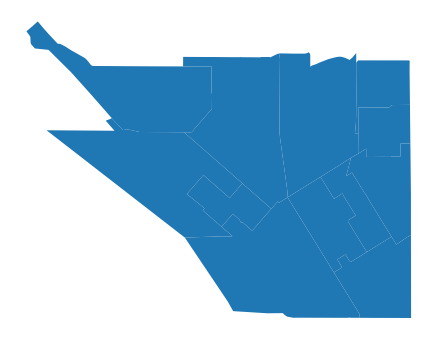

In [46]:
fig, ax = plt.subplots(1, figsize=(10, 6))
zoneshp.plot(ax=ax)
#check the data
ax.axis('off')

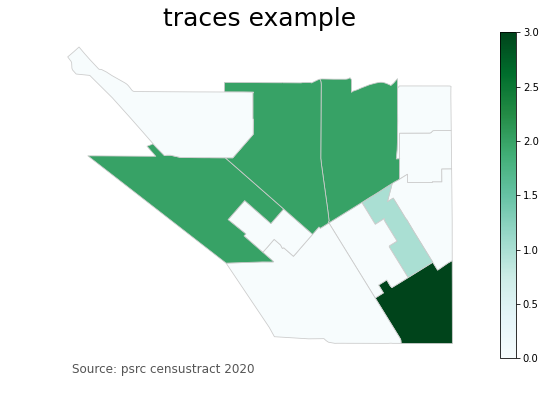

In [52]:
fig, ax = plt.subplots(1, figsize=(10, 6))
variable = 'obs_sum_d'
# set the range for the choropleth
vmin, vmax = 0, 3
variable = 'traces'
zoneshp.plot(column=variable, cmap='BuGn', linewidth=0.8, \
            ax=ax, edgecolor='0.8')
#check the data
#remove axis
ax.axis('off')
# add a title
ax.set_title('traces example', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: psrc censustract 2020',xy=(0.1, .08), xycoords='figure fraction', \
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
colbar = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
colbar._A = []
# add the colorbar to the figure
cbar = fig.colorbar(colbar)
#saving our map as .png file.

In [47]:
zoneshp['traces']

0     0
1     0
2     2
3     0
4    -1
5     0
6     0
7     0
8     1
9     1
10    1
11    0
Name: traces, dtype: int64

In [6]:
#code not processed
#map plot
#compared with the previous figures, 
#the hourly pattern varied compared the hourly obs vs. hourly identified ids
# set a variable that will call whatever column we want to visualise on the map
variable = 'obs_sum_d'
# set the range for the choropleth
vmin, vmax = 22, 75008
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

obs_ct = CensusTract.merge(obs_sum_d, left_on='GEOID10', right_on='geoid')
#create map
obs_ct.plot(column=variable, cmap='BuGn', linewidth=0.8, \
            ax=ax, edgecolor='0.8')
#check the data
print(obs_ct['obs_sum_d'].describe())

#remove axis
ax.axis('off')
# add a title
ax.set_title('observations per census tract', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: psrc censustract 2020',xy=(0.1, .08), xycoords='figure fraction', \
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
colbar = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
colbar._A = []
# add the colorbar to the figure
cbar = fig.colorbar(colbar)
#saving our map as .png file.
#fig.savefig(‘map_export.png’, dpi=300)

# set a variable that will call whatever column we want to visualise on the map
def plot_map_based_on_var(var, data, colormap, plot_title):
    variable = var
    # set the range for the choropleth
    vmin = data[var].min()
    vmax = data[var].max()
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))

    #obs_ct = CensusTract.merge(data, left_on='GEOID10', right_on='geoid')
    #create map
    data.plot(column=variable, cmap=colormap, linewidth=0.8, \
                ax=ax, edgecolor='0.8')

    #remove axis
    ax.axis('off')
    # add a title
    ax.set_title(plot_title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    ax.annotate('Source: psrc census tract 2020',xy=(0.1, .08), xycoords='figure fraction', \
                horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    #saving our map as .png file.
    #fig.savefig(‘map_export.png’, dpi=300)

In [1]:
pygmt.show_versions()

NameError: name 'pygmt' is not defined

In [8]:
fig = pygmt.Figure()
fig.coast(
    # Set the x-range from 10E to 20E and the y-range to 35N to 45N
    region="10/20/35/45",
    # Set projection to Mercator, and the figure size to 15 centimeters
    projection="M15c",
    # Set the color of the land to light gray
    land="lightgray",
    # Set the color of the water to white
    water="white",
    # Display the national borders and set the pen thickness to 0.5p
    borders="1/0.5p",
    # Display the shorelines and set the pen thickness to 0.5p
    shorelines="1/0.5p",
    # Set the frame to display annotations and gridlines
    frame="ag",
)
fig.show()

psconvert [ERROR]: Cannot execute Ghostscript (gswin64c).


GMTCLibError: Module 'psconvert' failed with status code 79:
psconvert [ERROR]: Cannot execute Ghostscript (gswin64c).

In [ ]:

highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1,vh.shape[1]):
    similarity = cosine_similarity(vh[:,0], vh[:,col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col

print("Column %d is most similar to column 0" % highest_sim_col)


